## Credit Risk Dataset Cleaning

In [10]:
# 1. Import Libraries
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

### 1. Load and Read Data

In [11]:
# Read excel file
cred = pd.read_excel('credit_risk.xlsx')
print(cred.info())
cred.head().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   client_ID                   32581 non-null  object 
 1   person_age                  32581 non-null  int64  
 2   person_income               32581 non-null  int64  
 3   person_home_ownership       32581 non-null  object 
 4   person_emp_length           31686 non-null  float64
 5   loan_intent                 32581 non-null  object 
 6   loan_grade                  32581 non-null  object 
 7   loan_amnt                   32581 non-null  int64  
 8   loan_int_rate               29465 non-null  float64
 9   loan_status                 32581 non-null  int64  
 10  loan_percent_income         32581 non-null  float64
 11  cb_person_default_on_file   32581 non-null  object 
 12  cb_person_cred_hist_length  32581 non-null  int64  
 13  gender                      325

,0,1,2,3,4
client_ID,CUST_00001,CUST_00002,CUST_00003,CUST_00004,CUST_00005
person_age,22,21,25,23,24
person_income,59000,9600,9600,65500,54400
person_home_ownership,RENT,OWN,MORTGAGE,RENT,RENT
person_emp_length,123.0,5.0,1.0,4.0,8.0
loan_intent,PERSONAL,EDUCATION,MEDICAL,MEDICAL,MEDICAL
loan_grade,D,B,C,C,C
loan_amnt,35000,1000,5500,35000,35000
loan_int_rate,16.02,11.14,12.87,15.23,14.27
loan_status,1,0,1,1,1


In [12]:
df = cred.copy()

### 2. Data Cleaning

In [13]:
# Calculate the percentage of missing values for each column
missing_percent = (df.isnull().sum() / len(df)) * 100

# Display only columns with missing values
missing_percent = missing_percent[missing_percent > 0]

# Format the output to show percentage with 2 decimal places
print("Percentage of missing values per column:")
print(missing_percent.round(2))

Percentage of missing values per column:
person_emp_length    2.75
loan_int_rate        9.56
dtype: float64


`Employment Length and Interest Rate`

In [14]:
# Inspect employment length and interest rate stats
df[['person_emp_length', 'loan_int_rate']].describe()

,person_emp_length,loan_int_rate
count,31686.000000,29465.000000
mean,4.789686,11.011695
std,4.142630,3.240459
min,0.000000,5.420000
25%,2.000000,7.900000
50%,4.000000,10.990000
75%,7.000000,13.470000
max,123.000000,23.220000


In [15]:
# Step 1: Define a reasonable, high upper bound for employment length
reasonable_max_emp = 60

# Step 2: Identify the impossible values (e.g., anything > 60) and set them to NaN.
# And target records with 123 value
df.loc[df['person_emp_length'] > reasonable_max_emp, 'person_emp_length'] = np.nan

# Step 3: Impute all missing values with the median.
# First calculate the median from the non-NaN, non-error data.
median_emp_length = df['person_emp_length'].median()
print(f"Median employment length for imputation: {median_emp_length} years")

# Then, fill all NaNs with this median value.
df['person_emp_length'].fillna(median_emp_length, inplace=True)

# Step 4: Handle loan_int_rate by filling with median
median_rates_by_grade = df.groupby('loan_grade')['loan_int_rate'].transform('median')
df['loan_int_rate'] = df['loan_int_rate'].fillna(median_rates_by_grade)

# Verification
print("\nMissing values after treatment:")
print(df[['person_emp_length', 'loan_int_rate']].isnull().sum())

Median employment length for imputation: 4.0 years

Missing values after treatment:
person_emp_length    0
loan_int_rate        0
dtype: int64


`Age`

In [16]:
# Inspect age stats
df.person_age.describe()

,person_age
count,32581.000000
mean,27.734600
std,6.348078
min,20.000000
25%,23.000000
50%,26.000000
75%,30.000000
max,144.000000


In [17]:

# 1. Isolate and handle 'impossible' ages
# Define a threshold for biological unlikehood.
impossible_age_limit = 100

# Find and count the unlikely values (ages > 100)
impossible_ages_mask = (df['person_age'] > impossible_age_limit)
num_impossible = impossible_ages_mask.sum()
print(f"Number of biologically impossible ages (> {impossible_age_limit}): {num_impossible}")

# Replace only those unlikely values with NaN
df.loc[impossible_ages_mask, 'person_age'] = np.nan

# 2. Impute errors with median
# Calculate the median from the remaining clean data
median_age = df['person_age'].median()
print(f"Median age for imputing the {num_impossible} errors: {median_age} years")

# Fill the NaNs with the median
df['person_age'].fillna(median_age, inplace=True)

# Verify
print("\nFinal Summary Statistics for 'person_age':")
print(df['person_age'].describe())

Number of biologically impossible ages (> 100): 5
Median age for imputing the 5 errors: 26.0 years

Final Summary Statistics for 'person_age':
count    32581.00000
mean        27.71778
std          6.20455
min         20.00000
25%         23.00000
50%         26.00000
75%         30.00000
max         94.00000
Name: person_age, dtype: float64


### 3. Feature Engineering

`Age features`

In [18]:
# Define the 6 specific age bins based on your function logic
age_bins = [0, 25, 35, 45, 55, 65, 100]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

# Create the age_group column using pd.cut()
df['age_group'] = pd.cut(df['person_age'],
                         bins=age_bins,
                         labels=age_labels,
                         right=False)


age_class_mapping = {
    '18-24': 'Youth',
    '25-34': 'Young Adult',
    '35-44': 'Adult',
    '45-54': 'Middle Age',
    '55-64': 'Senior',
    '65+': 'Elderly'
}

df['age_class'] = df['age_group'].map(age_class_mapping)

# Check the distribution of both columns
print("Age Group Distribution:")
print(df['age_group'].value_counts().sort_index())
print("\nAge Class Distribution:")
print(df['age_class'].value_counts())

Age Group Distribution:
age_group
18-24    12315
25-34    16185
35-44     3326
45-54      601
55-64      115
65+         39
Name: count, dtype: int64

Age Class Distribution:
age_class
Young Adult    16185
Youth          12315
Adult           3326
Middle Age       601
Senior           115
Elderly           39
Name: count, dtype: int64


`Loan Cost`

In [19]:
# Estimated total cost of the loan
df['total_loan_cost'] = df['loan_amnt'] * (1 + (df['loan_int_rate']/100) * (df['loan_term_months']/12))



In [20]:
# View information if final dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   client_ID                   32581 non-null  object  
 1   person_age                  32581 non-null  float64 
 2   person_income               32581 non-null  int64   
 3   person_home_ownership       32581 non-null  object  
 4   person_emp_length           32581 non-null  float64 
 5   loan_intent                 32581 non-null  object  
 6   loan_grade                  32581 non-null  object  
 7   loan_amnt                   32581 non-null  int64   
 8   loan_int_rate               32581 non-null  float64 
 9   loan_status                 32581 non-null  int64   
 10  loan_percent_income         32581 non-null  float64 
 11  cb_person_default_on_file   32581 non-null  object  
 12  cb_person_cred_hist_length  32581 non-null  int64   
 13  gender          

### 4. Quick Data Exploration - Correlation

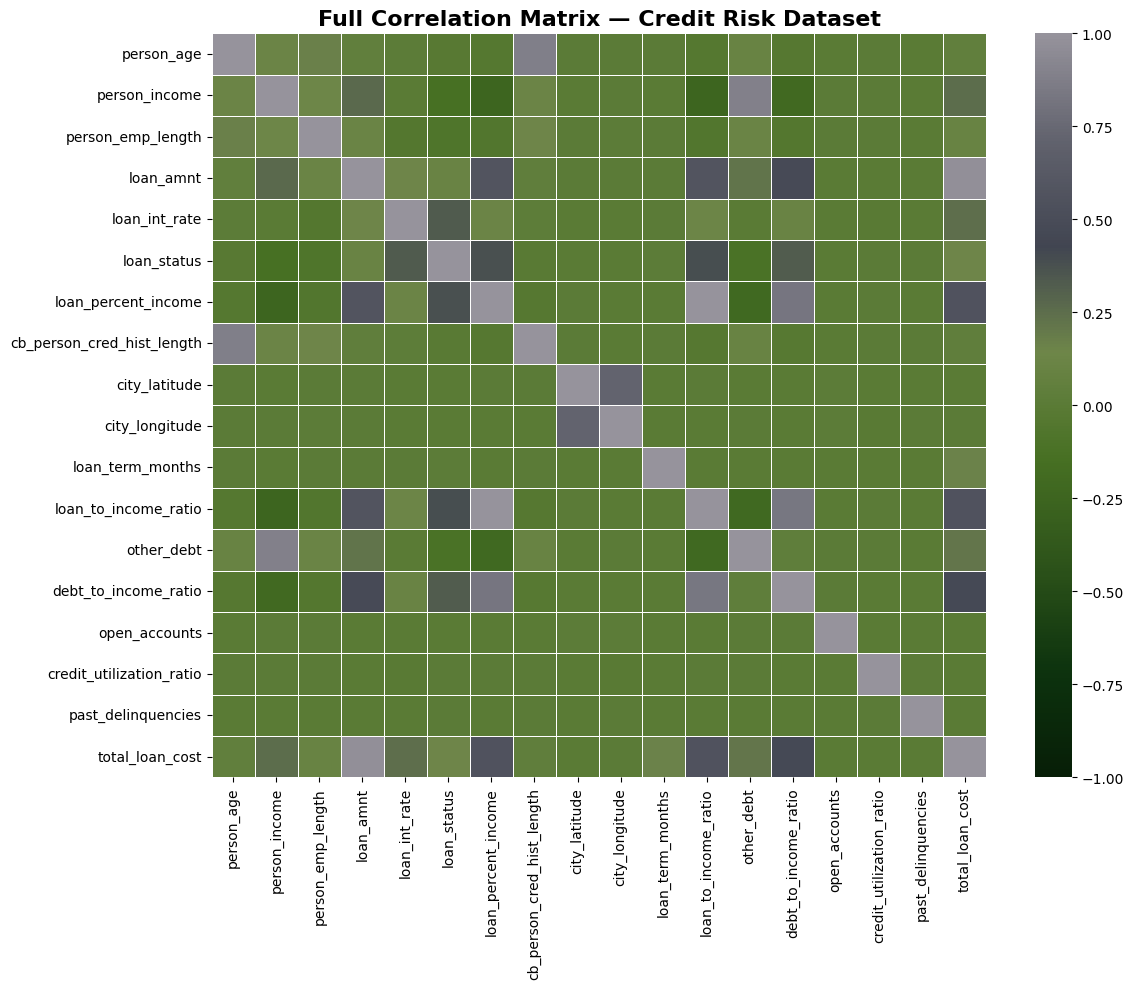


=== Highly correlated pairs (|r| ≥ 0.7) ===
                 Feature1                    Feature2  Correlation   AbsCorr
91    loan_percent_income        loan_to_income_ratio     0.998942  0.998942
61              loan_amnt             total_loan_cost     0.970216  0.970216
27          person_income                  other_debt     0.886763  0.886763
6              person_age  cb_person_cred_hist_length     0.877741  0.877741
133  loan_to_income_ratio        debt_to_income_ratio     0.828902  0.828902
93    loan_percent_income        debt_to_income_ratio     0.827934  0.827934
108         city_latitude              city_longitude     0.714451  0.714451


In [21]:
# Full correlation matrix + grouping correlated feature pairs
from itertools import combinations
from matplotlib.colors import LinearSegmentedColormap

# Keep only numeric columns
num_df = df.select_dtypes(include=[np.number])

# Correlation matrix
corr = num_df.corr()

# === 1. Plot heatmap ===
hex_list = ["#071e07","#0d330e","#2d531a","#477023",
            "#6e8649","#414551","#61626d","#96939c"]
cmap = LinearSegmentedColormap.from_list("custom_palette", hex_list, N=256)

plt.figure(figsize=(12,10))
sns.heatmap(
    corr,
    cmap=cmap,
    center=0,
    vmin=-1, vmax=1,
    linewidths=.5,
    # annot=True, fmt=".2f"   # Uncomment for numeric labels
)
plt.title("Full Correlation Matrix — Credit Risk Dataset", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()

# === 2. Find correlated feature pairs (excluding self-correlation) ===
pairs = []
for f1, f2 in combinations(corr.columns, 2):
    r = corr.loc[f1, f2]
    pairs.append((f1, f2, r))

pairs_df = pd.DataFrame(pairs, columns=["Feature1","Feature2","Correlation"])
pairs_df["AbsCorr"] = pairs_df["Correlation"].abs()
pairs_df = pairs_df.sort_values("AbsCorr", ascending=False)

# Define thresholds
high = pairs_df[pairs_df["AbsCorr"] >= 0.7]
moderate = pairs_df[(pairs_df["AbsCorr"] >= 0.4) & (pairs_df["AbsCorr"] < 0.7)]
weak = pairs_df[(pairs_df["AbsCorr"] >= 0.2) & (pairs_df["AbsCorr"] < 0.4)]
negligible = pairs_df[pairs_df["AbsCorr"] < 0.2]

# Print only high correlations
print("\n=== Highly correlated pairs (|r| ≥ 0.7) ===")
print(high)


  - Key Correlation Insights

**Financial Metrics**
- Income verification is crucial - directly links to debt levels
- Loan amount drives total cost (97% correlation)

**Borrower Patterns**
- Older applicants have longer credit histories
- Loan-to-income ratios are essentially duplicate metrics

**Risk Focus**
- Monitor debt-to-income ratios closely
- Age and credit history are reliable paired indicators

### 5. Save Cleaned File

In [22]:
# Save the DataFrame to Excel ---to use in power bi
output_file_path = "credit_cleaned.xlsx"
df.to_excel(output_file_path, index=False, sheet_name='Loan_Applications')

print(f"Data successfully saved to: {output_file_path}")
print(f"Shape of saved data: {df.shape}")

Data successfully saved to: credit_cleaned.xlsx
Shape of saved data: (32581, 32)
